In [4]:
%cd ..

/home/zarizky/projects/neural-autoregressive-object-co-occurrence


In [17]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.special import gamma
from scipy.stats import norm, poisson

sns.set_theme(style="whitegrid")

In [52]:
def negbinom(x, mu, alpha):
    p = gamma(x + alpha) / (gamma(alpha) * gamma(x + 1))
    p *= (1 + mu/alpha) ** -alpha
    p *= (mu / (mu + alpha)) ** x
    return p


def zero_inflated(x, theta, pmf):
    if x == 0:
        return theta + (1 - theta) * pmf(x)

    return (1 - theta) * pmf(x)

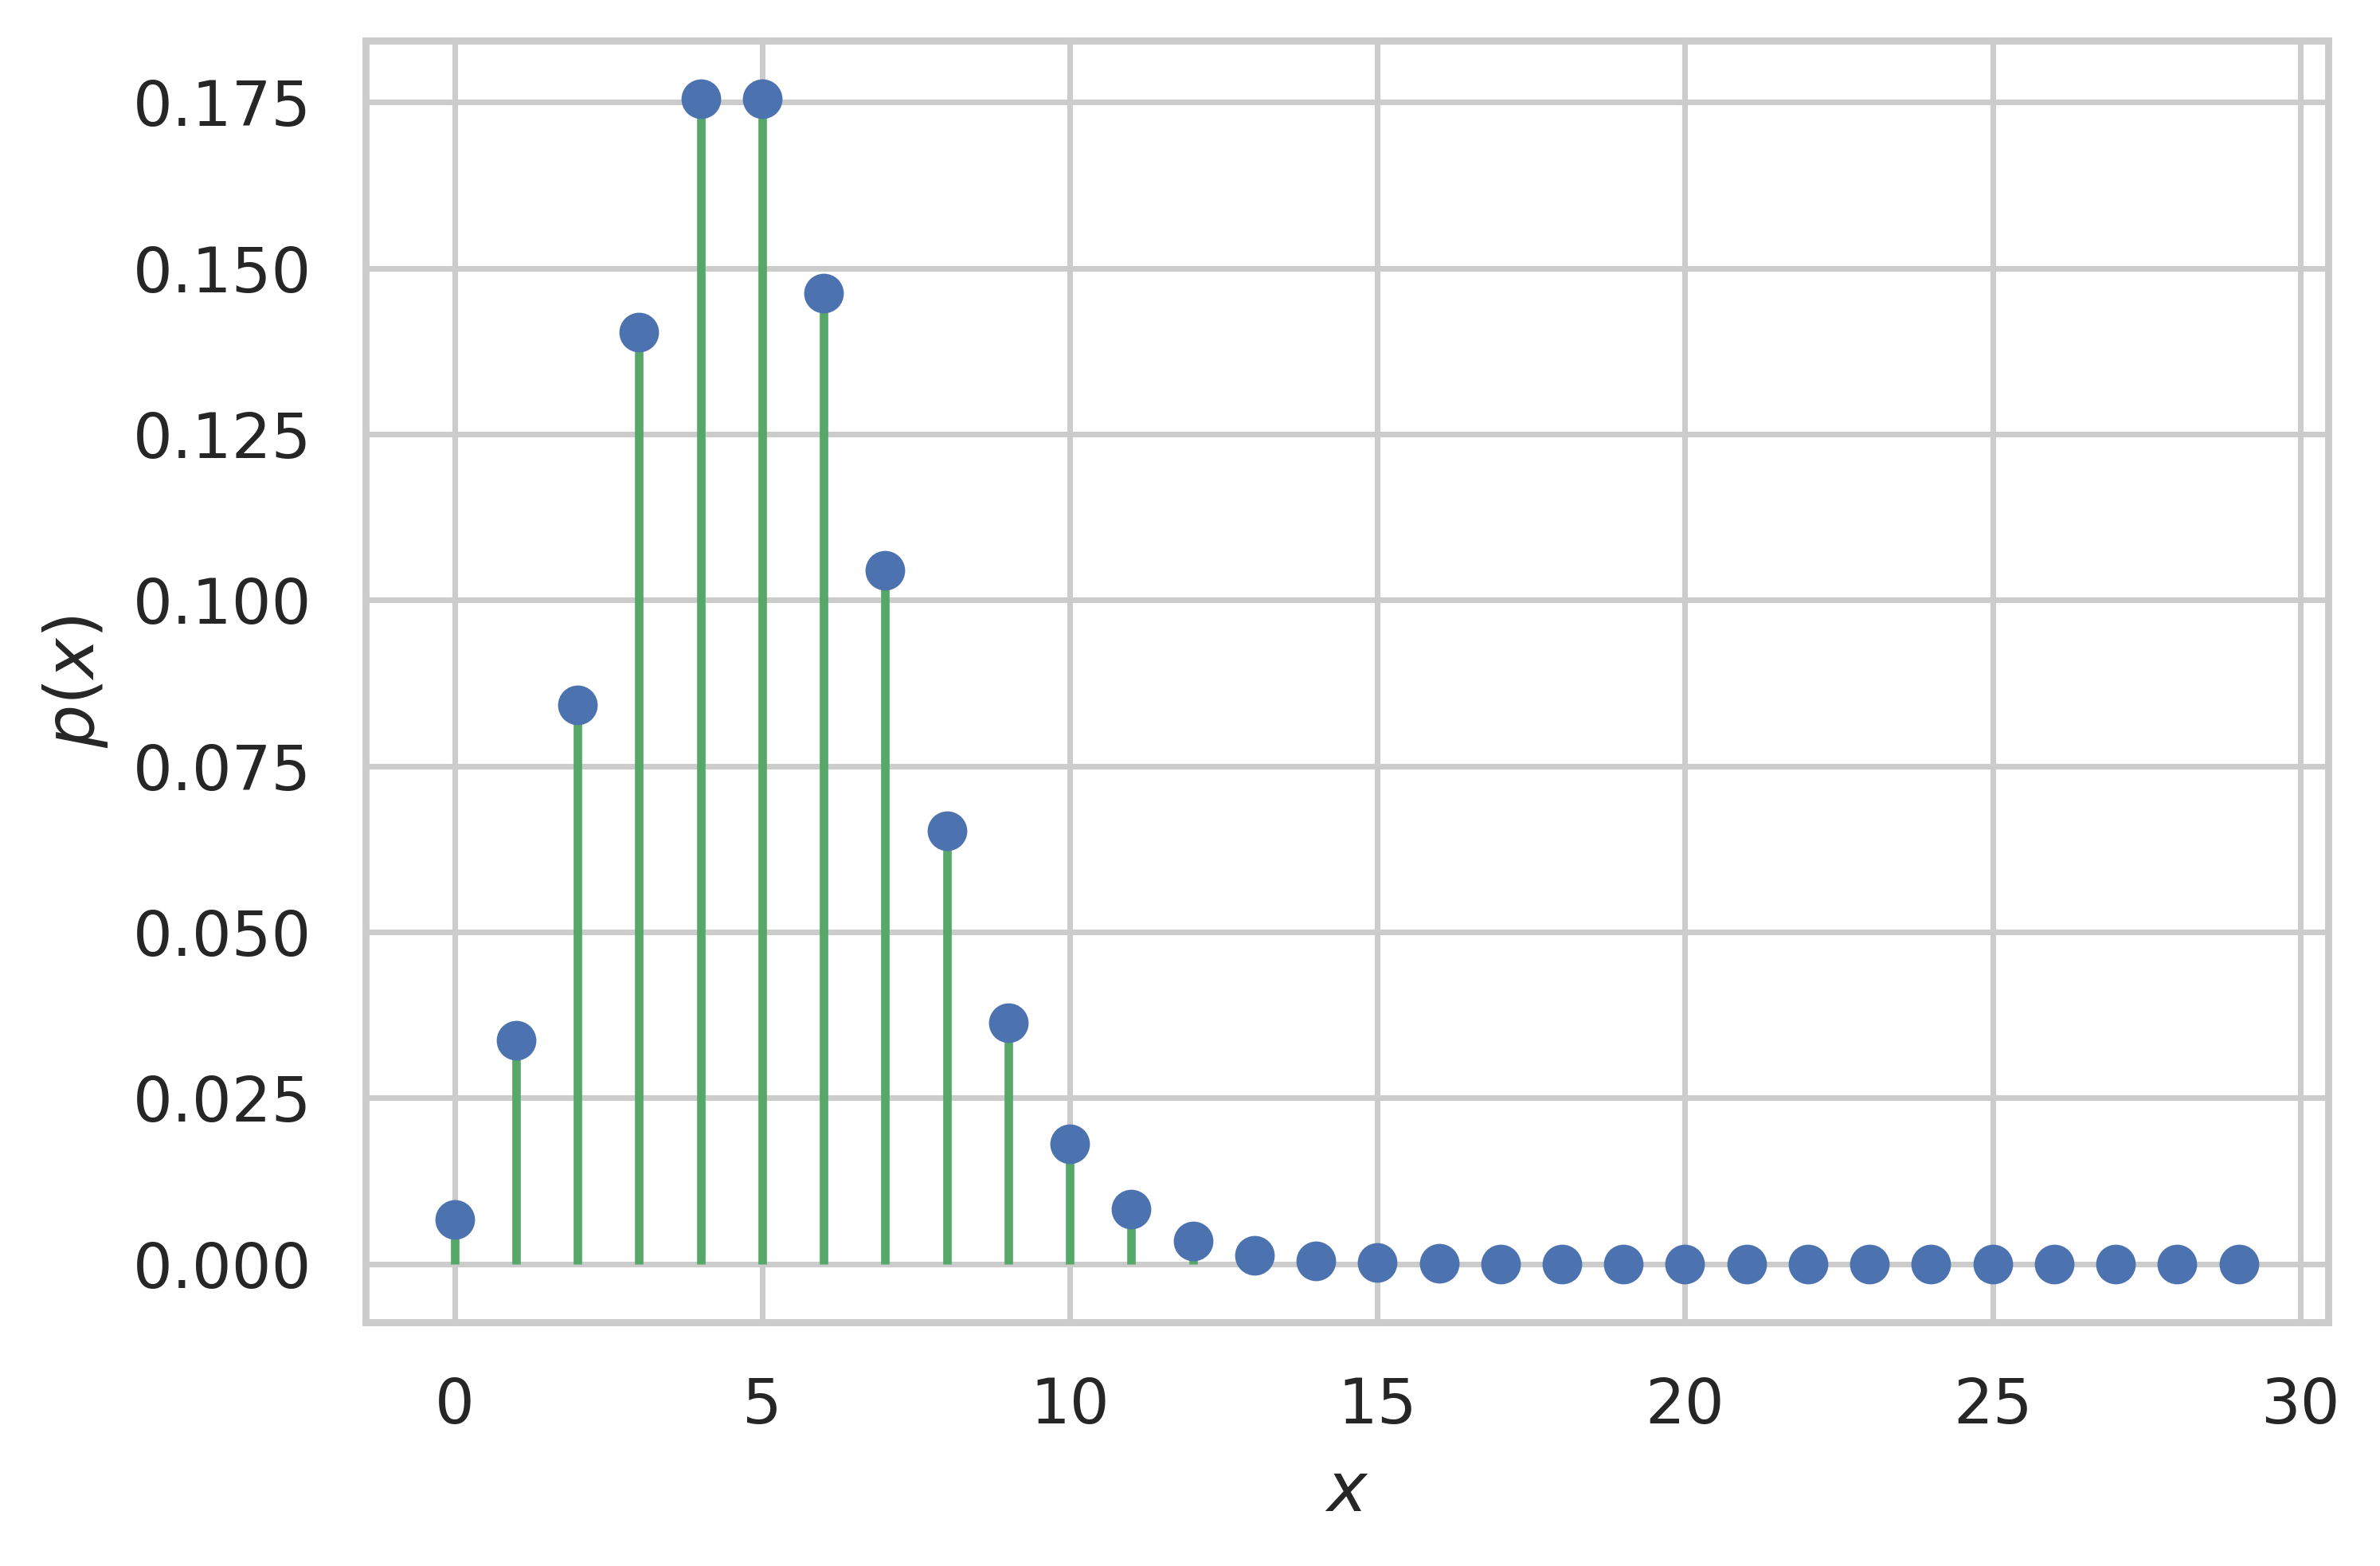

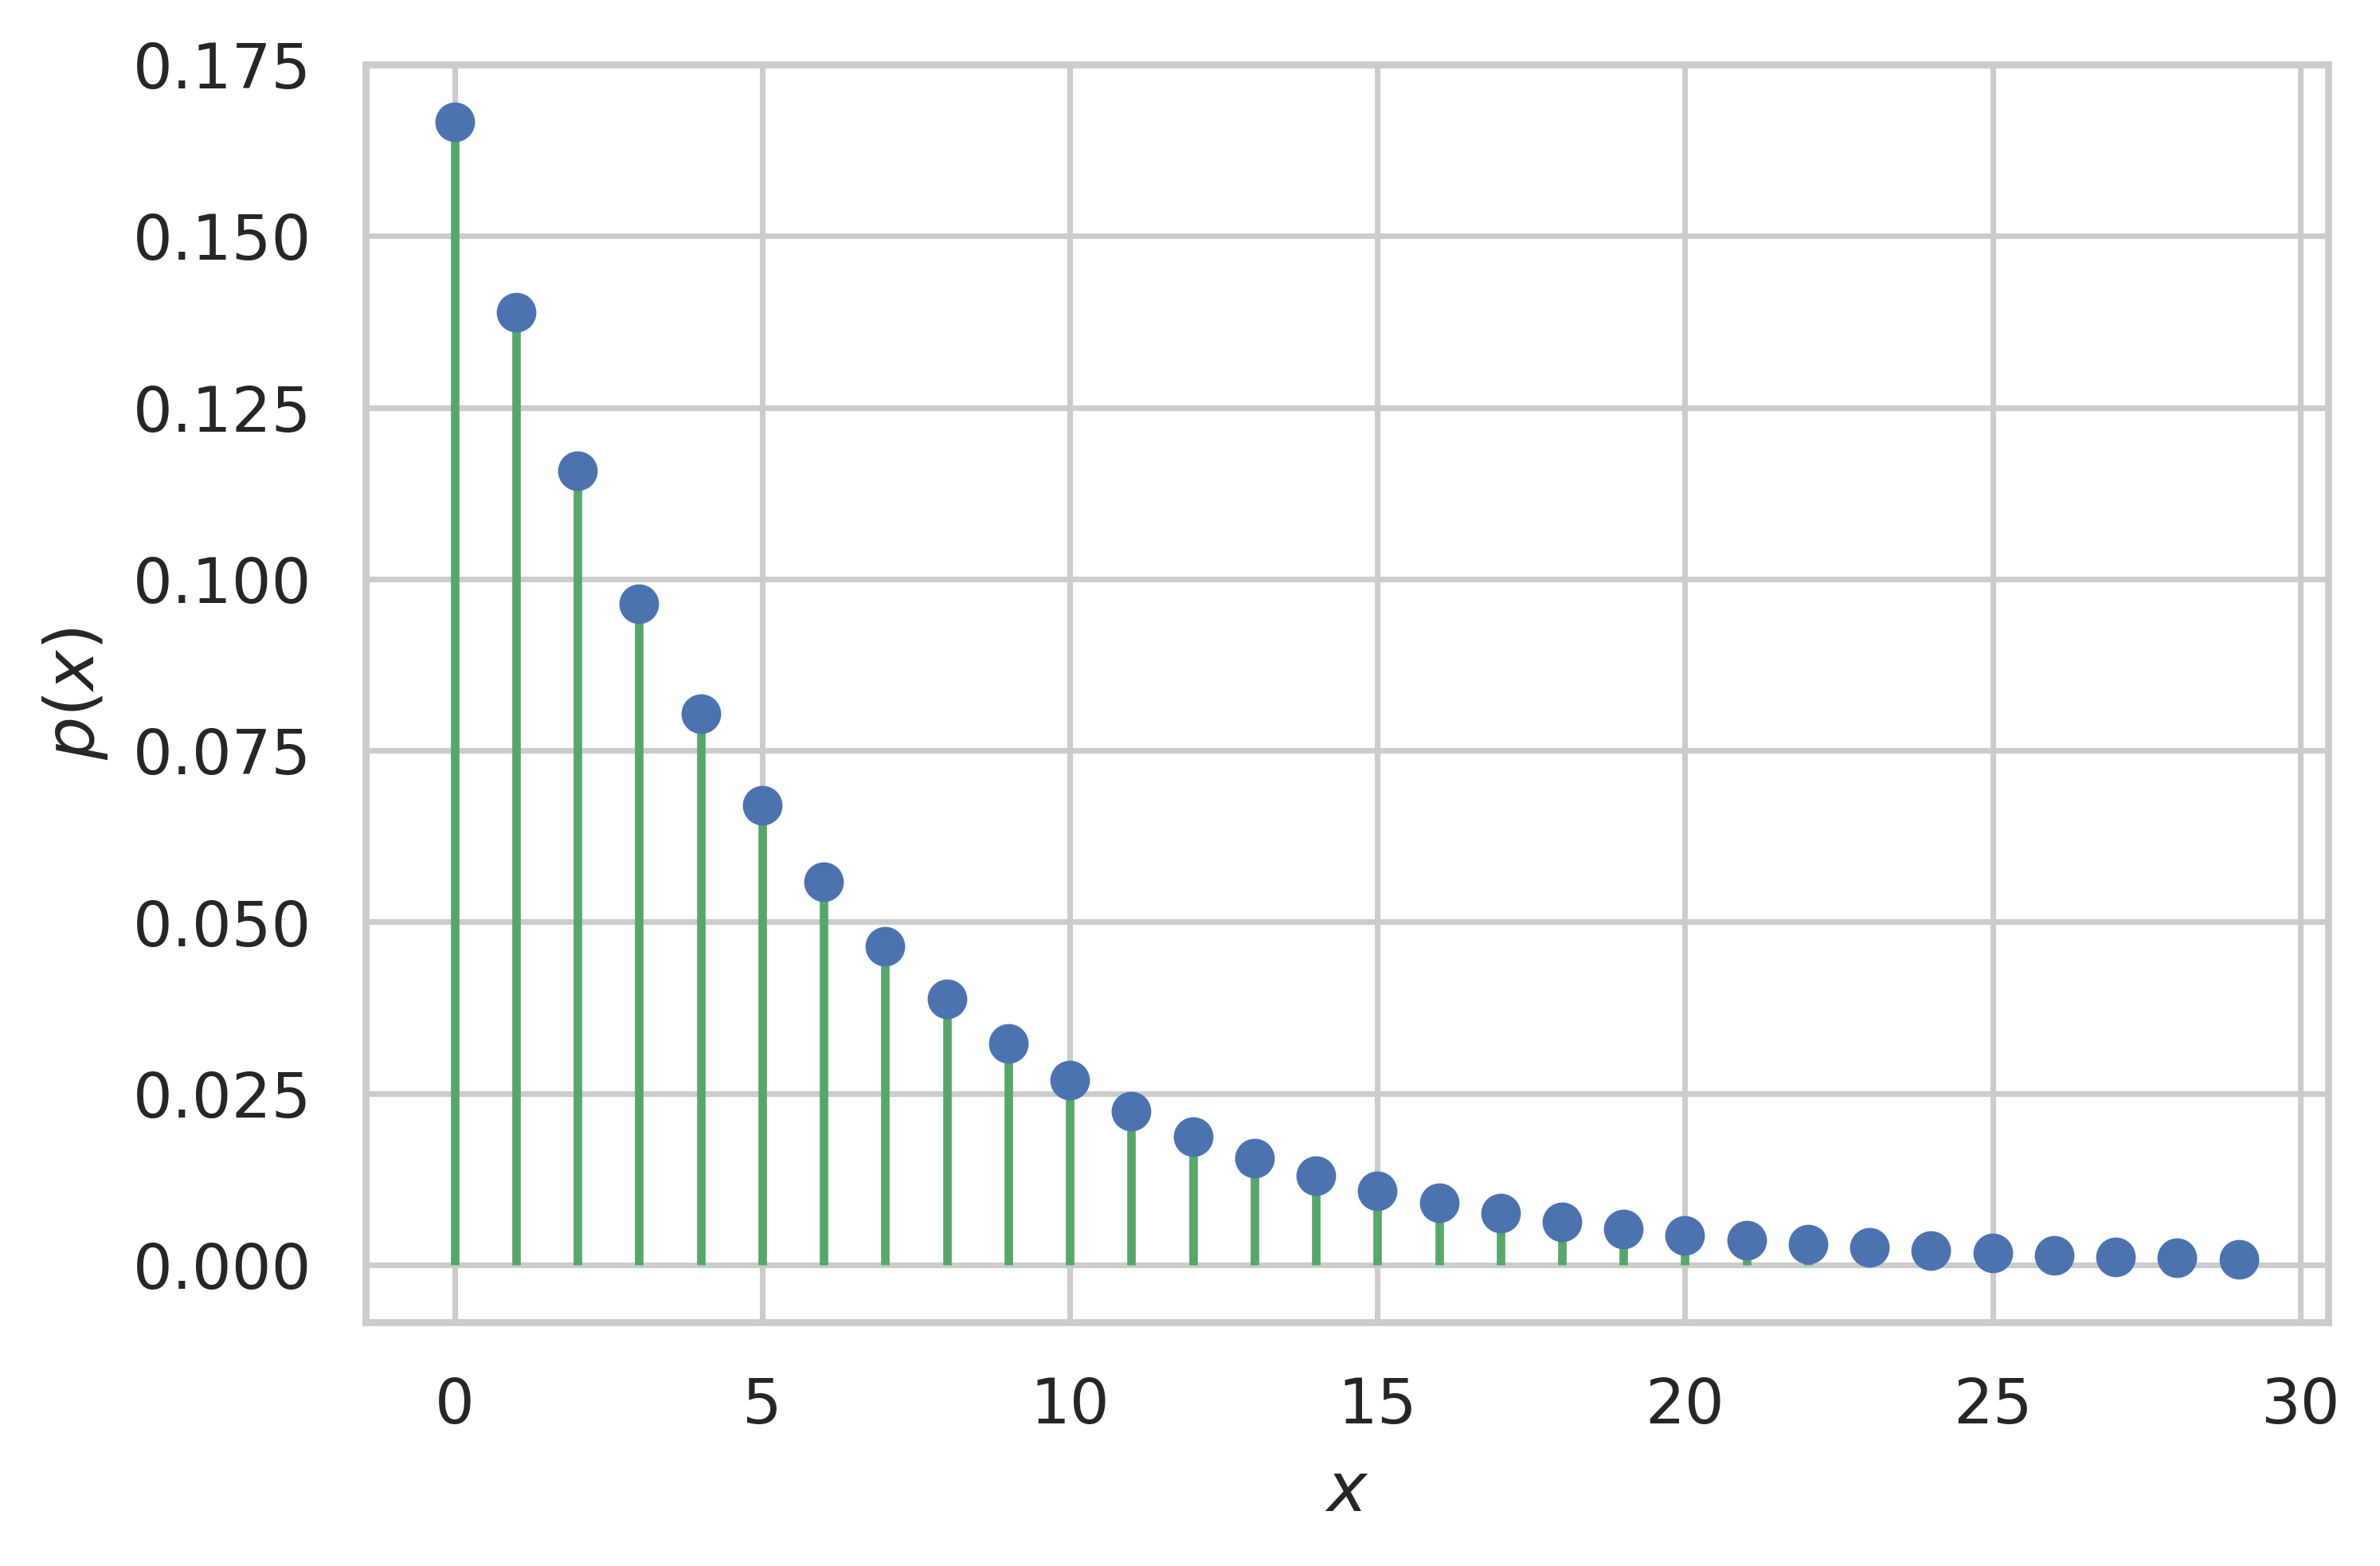

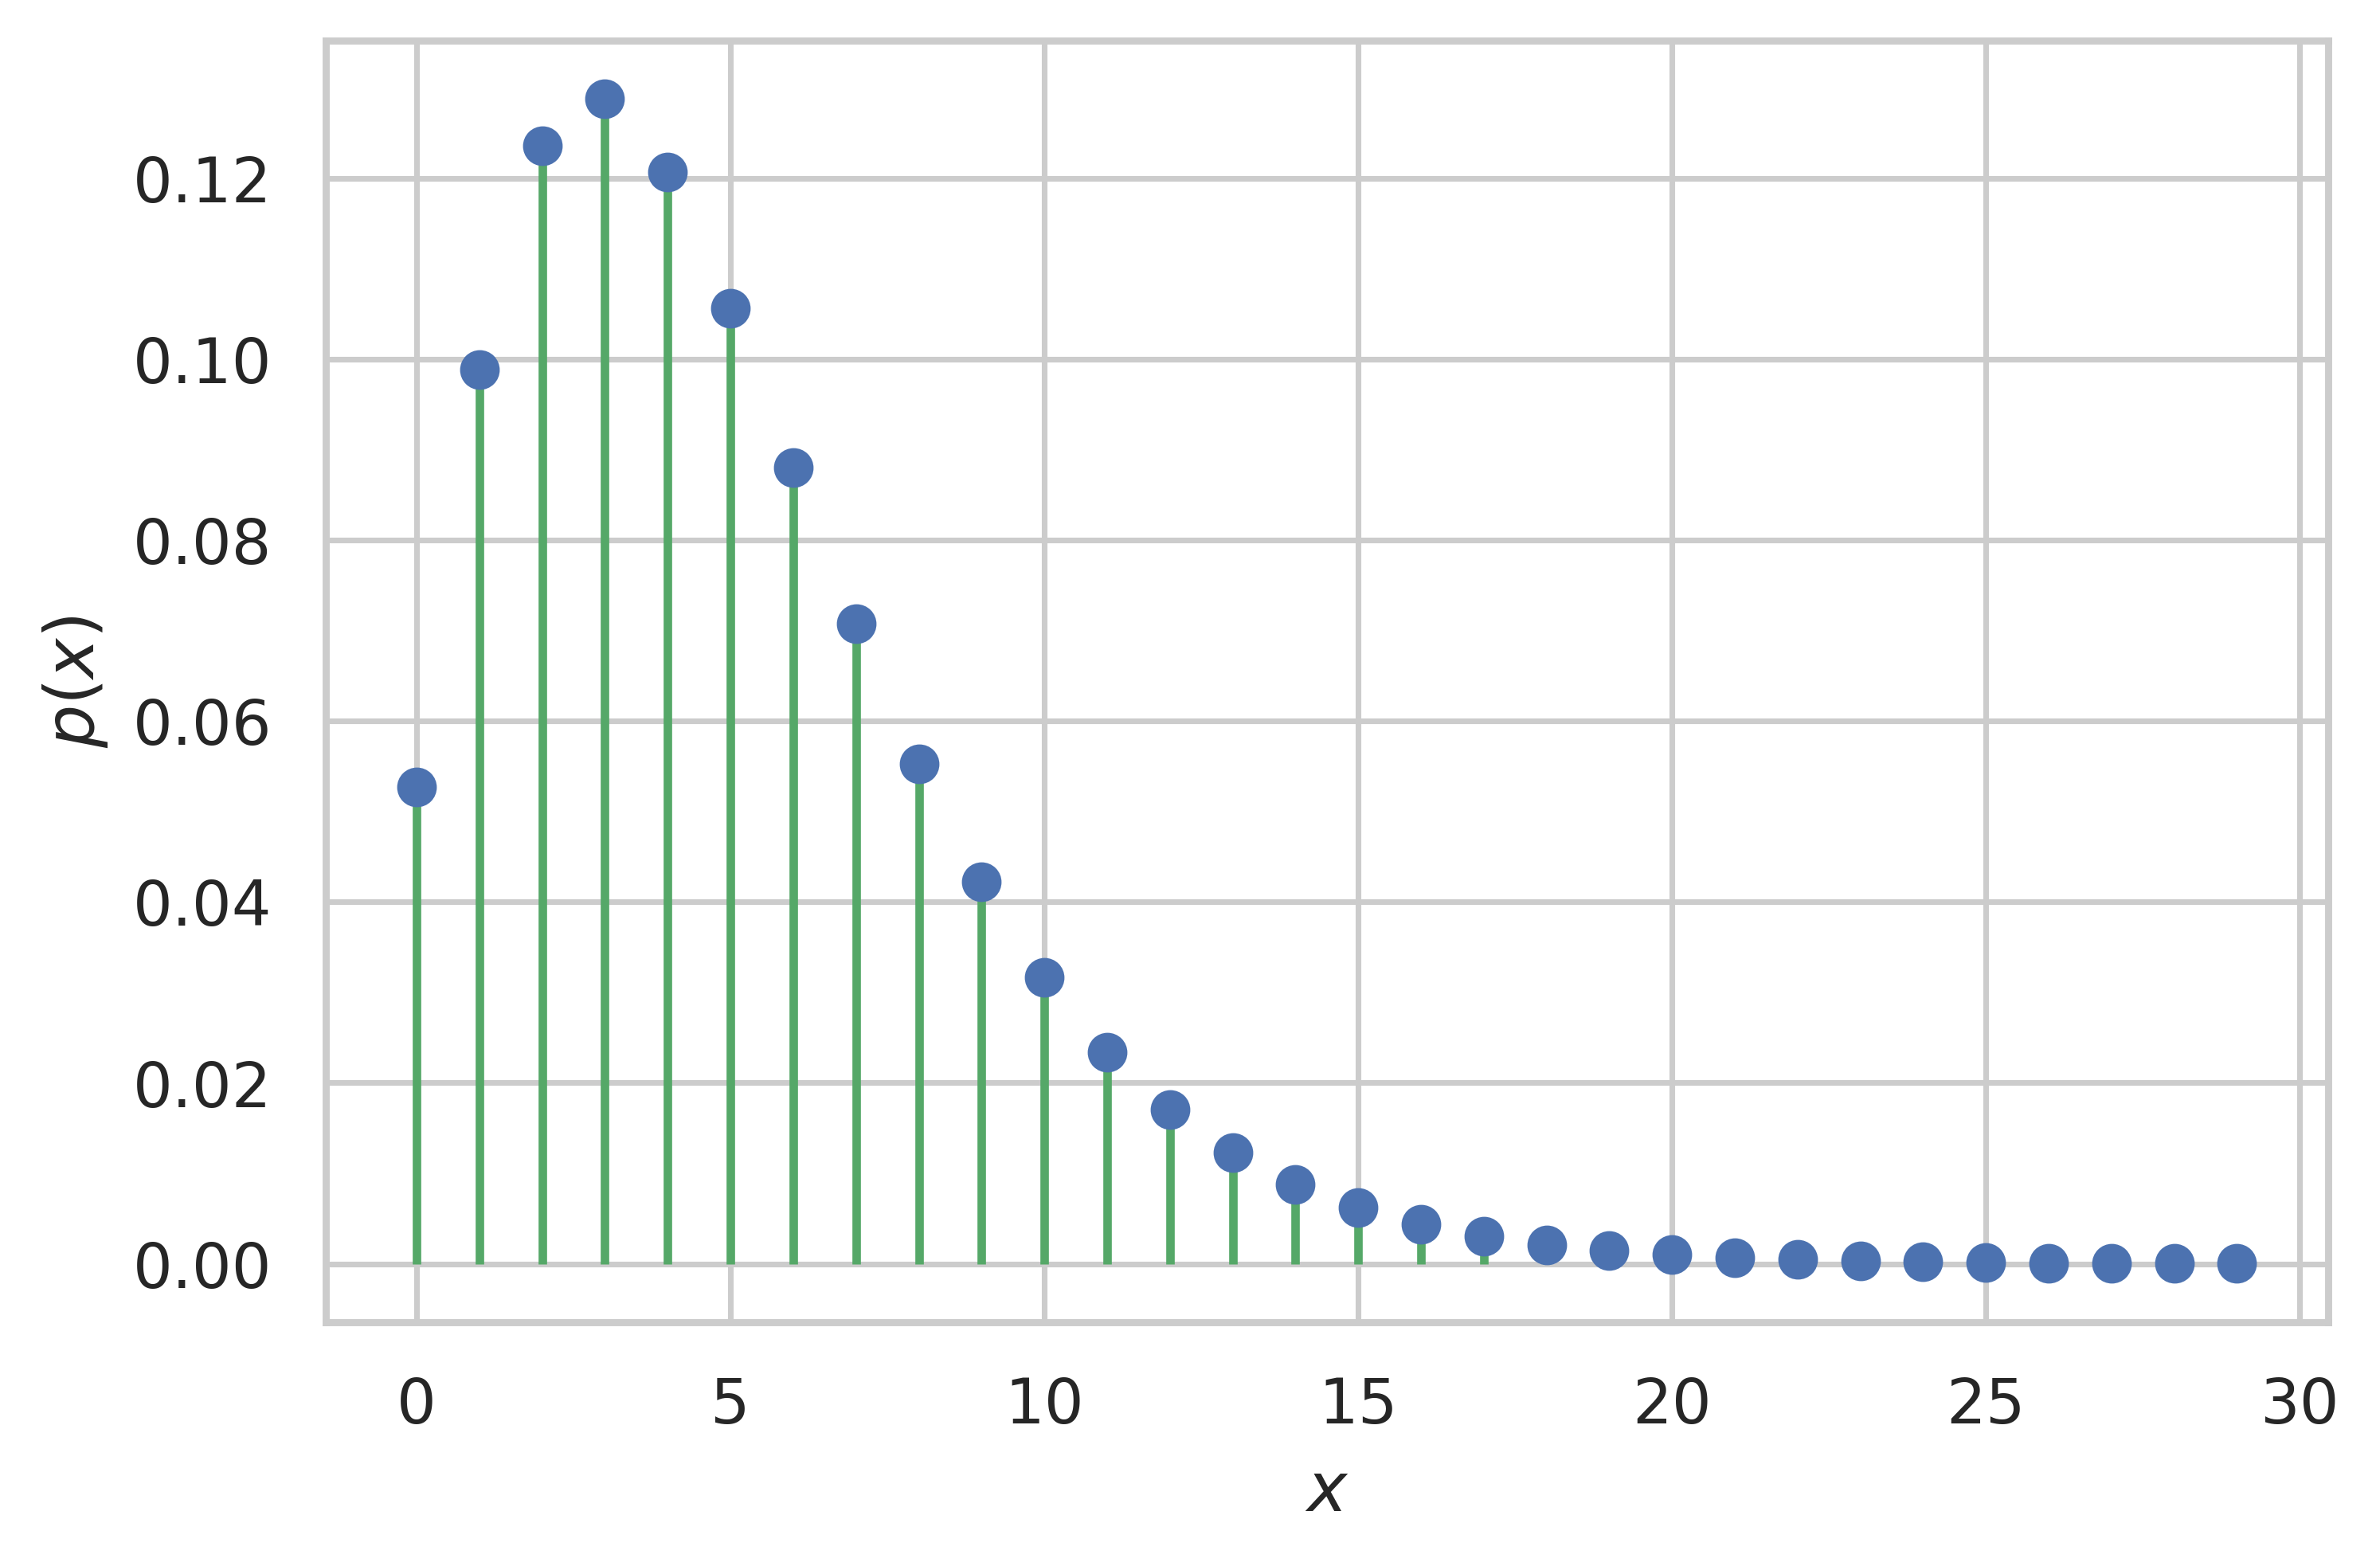

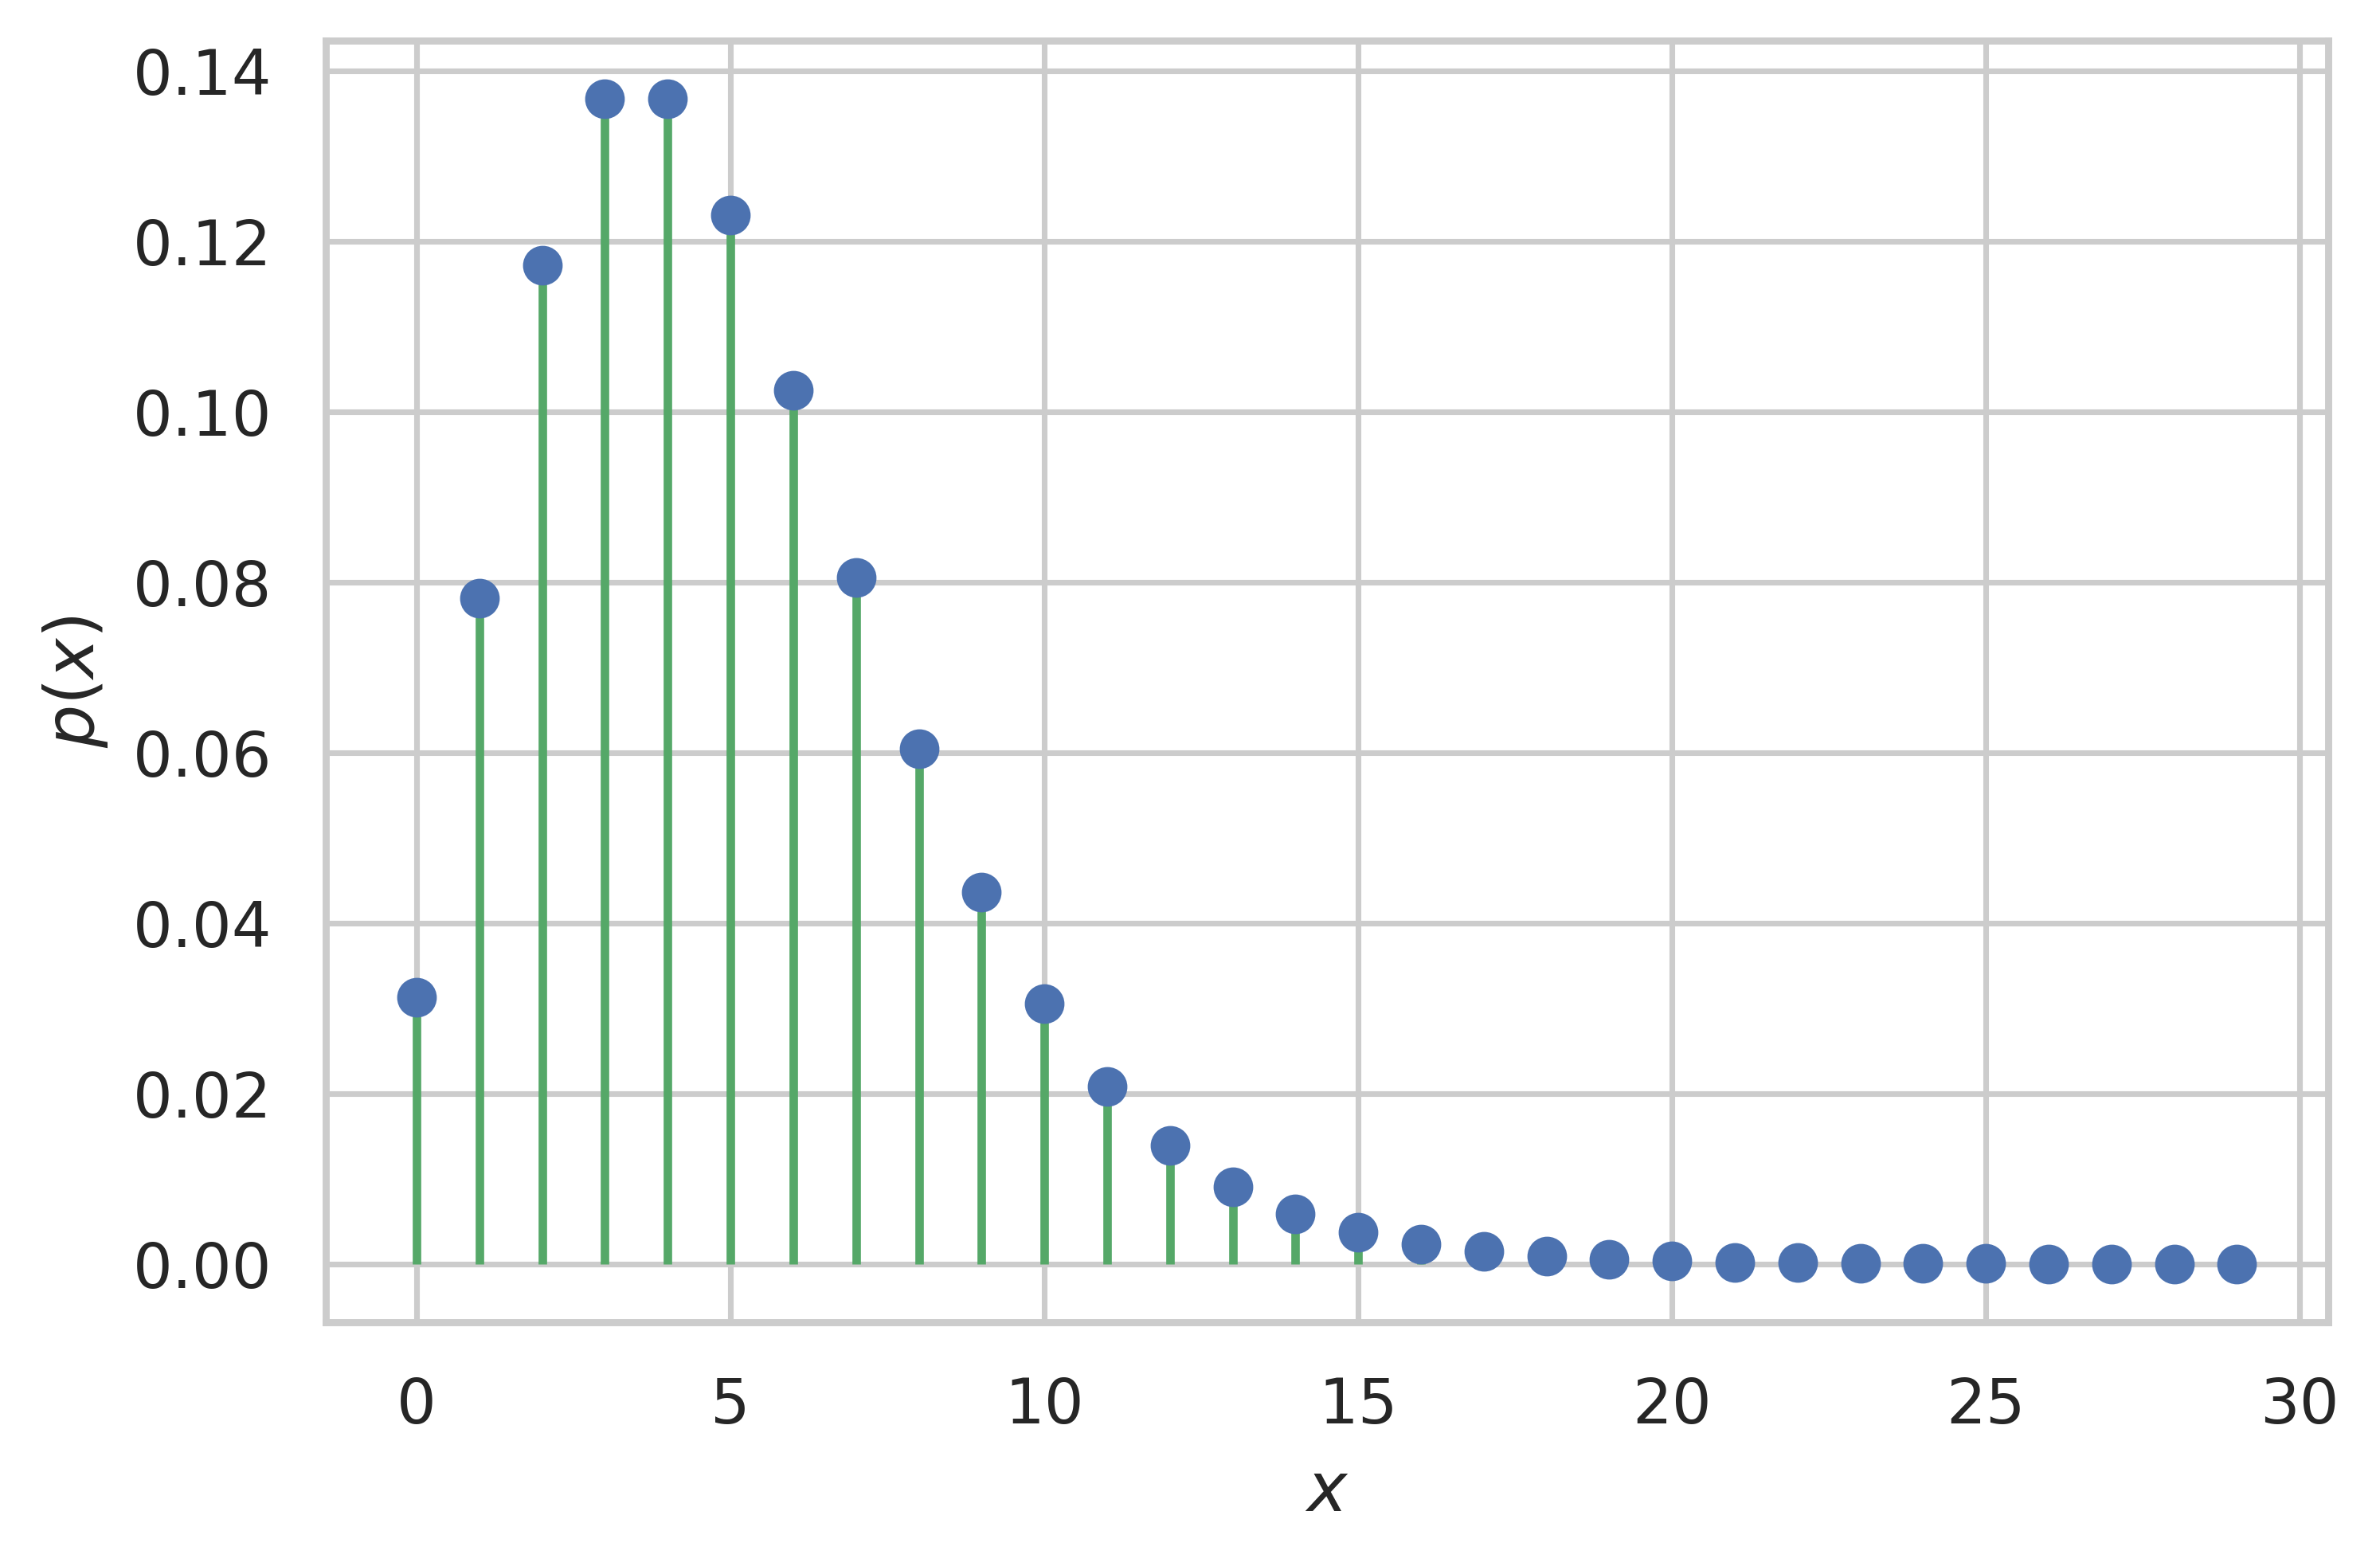

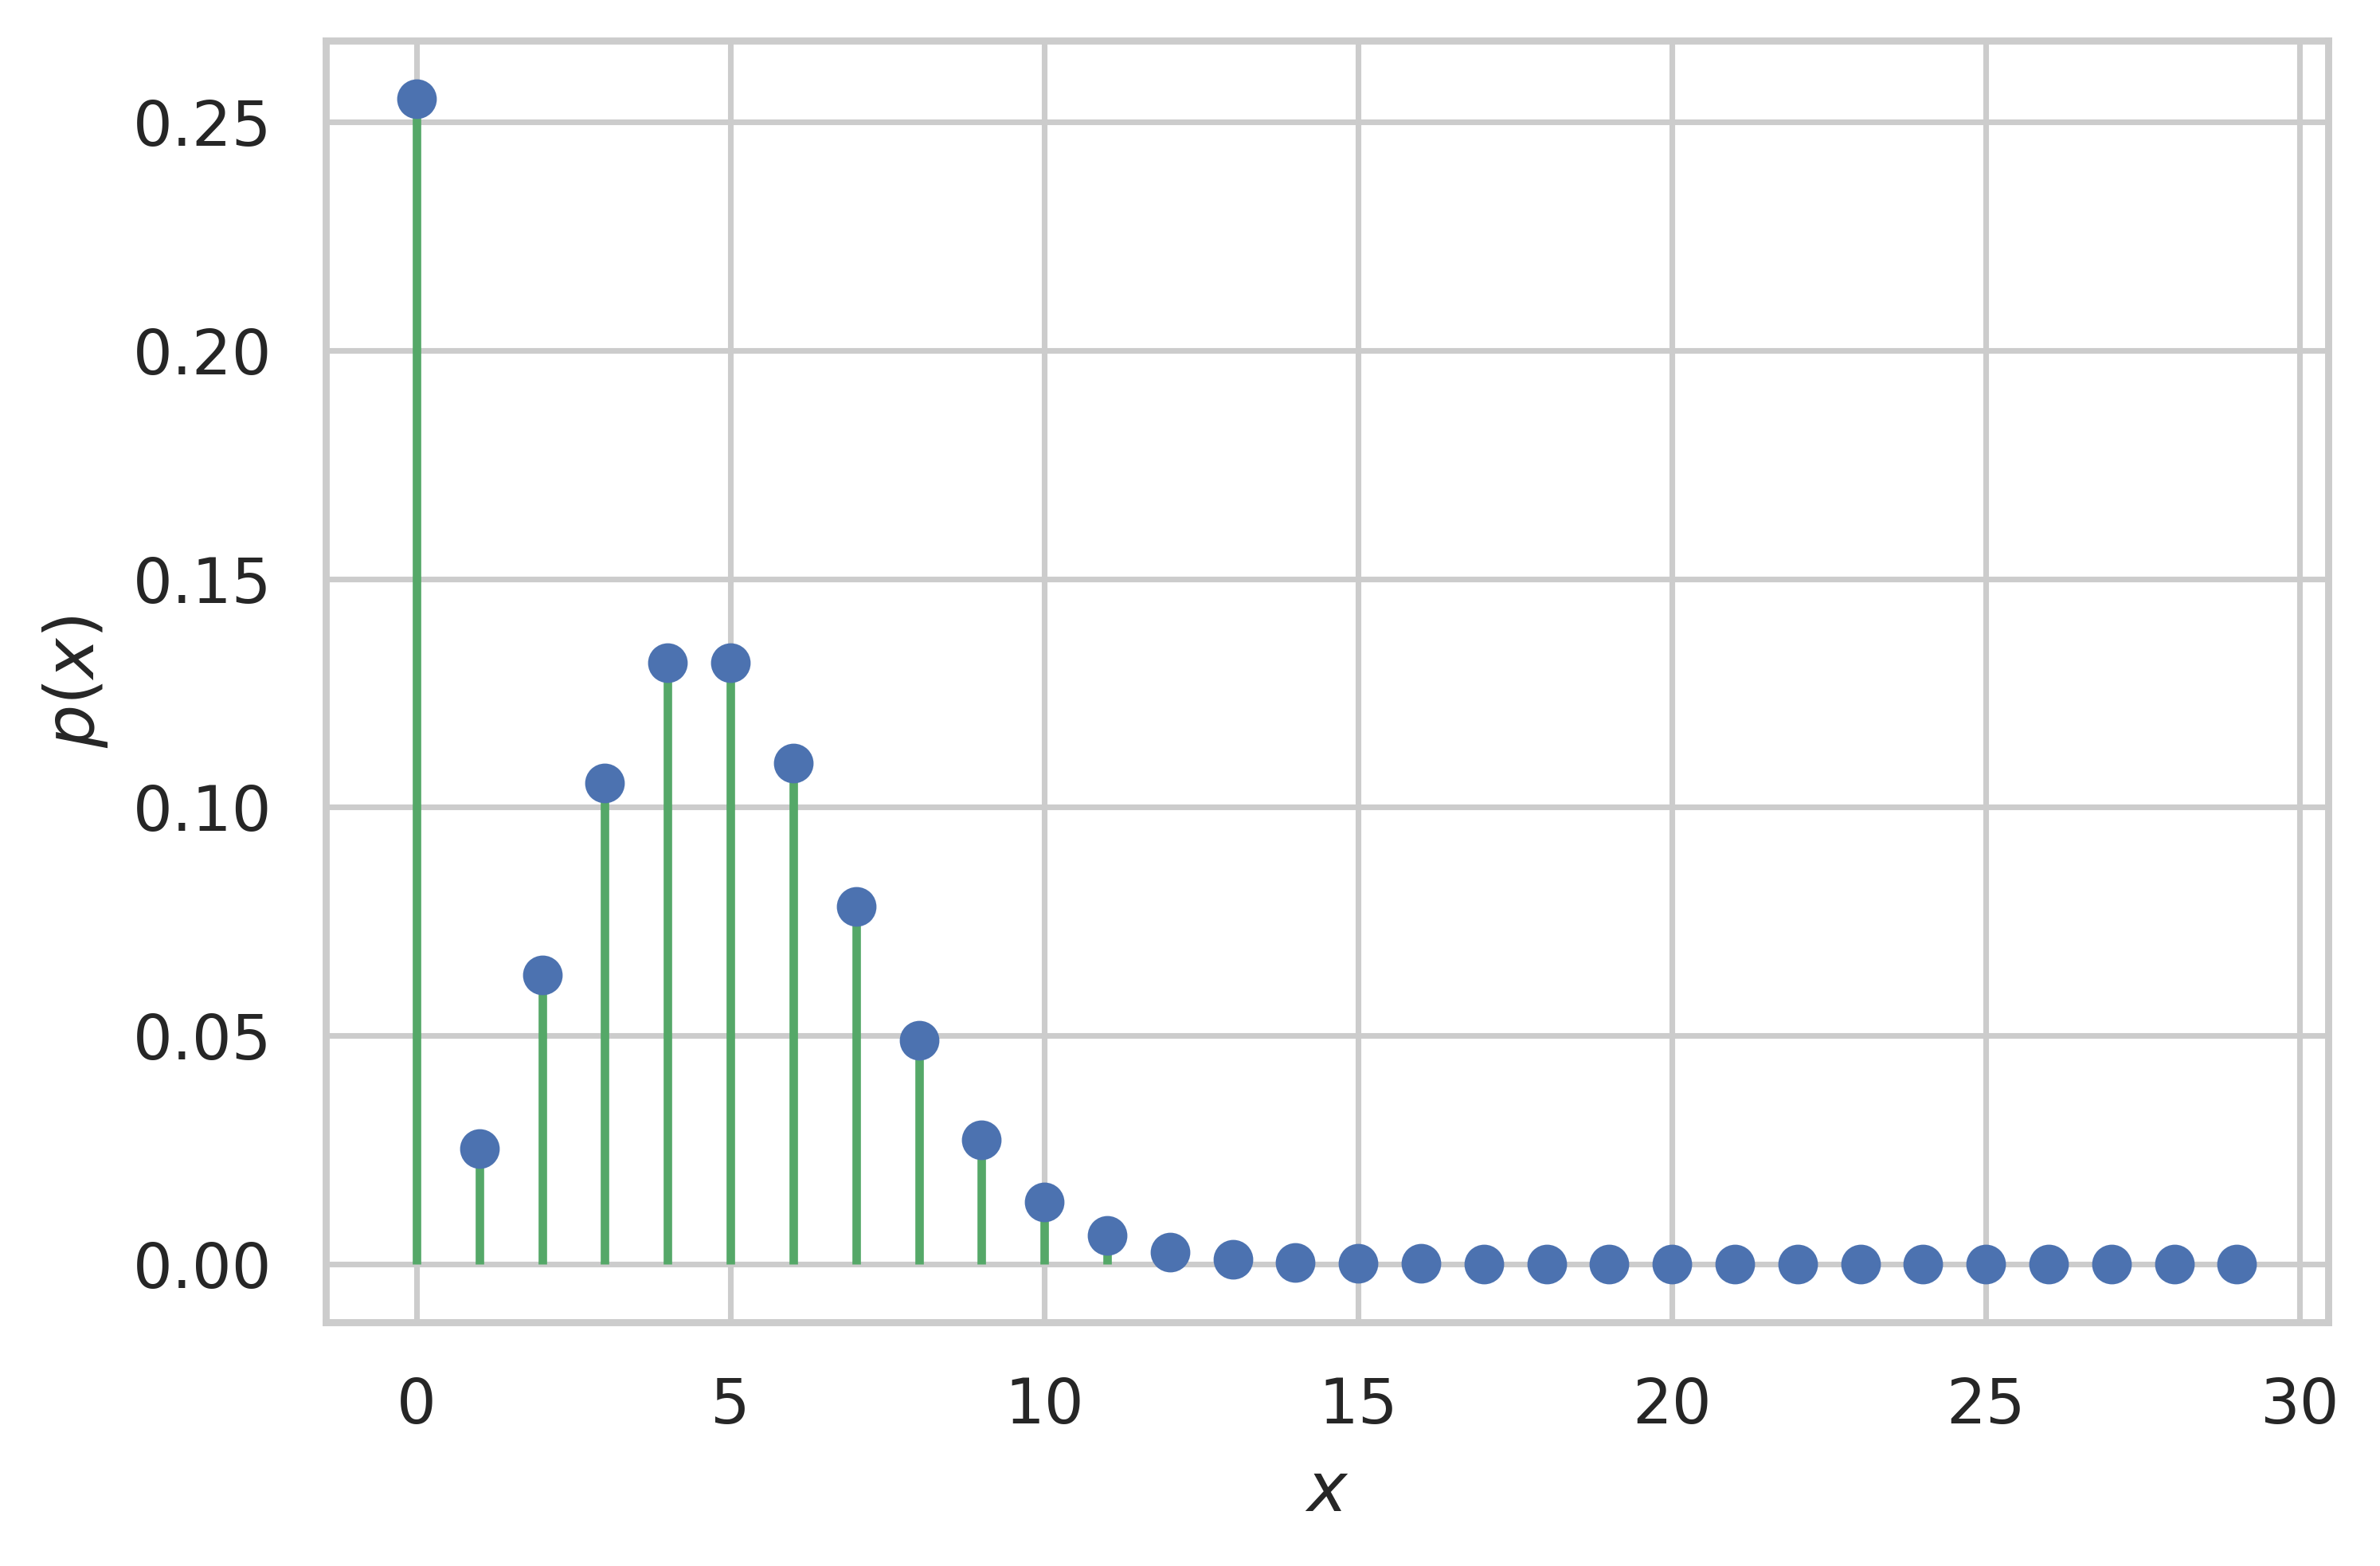

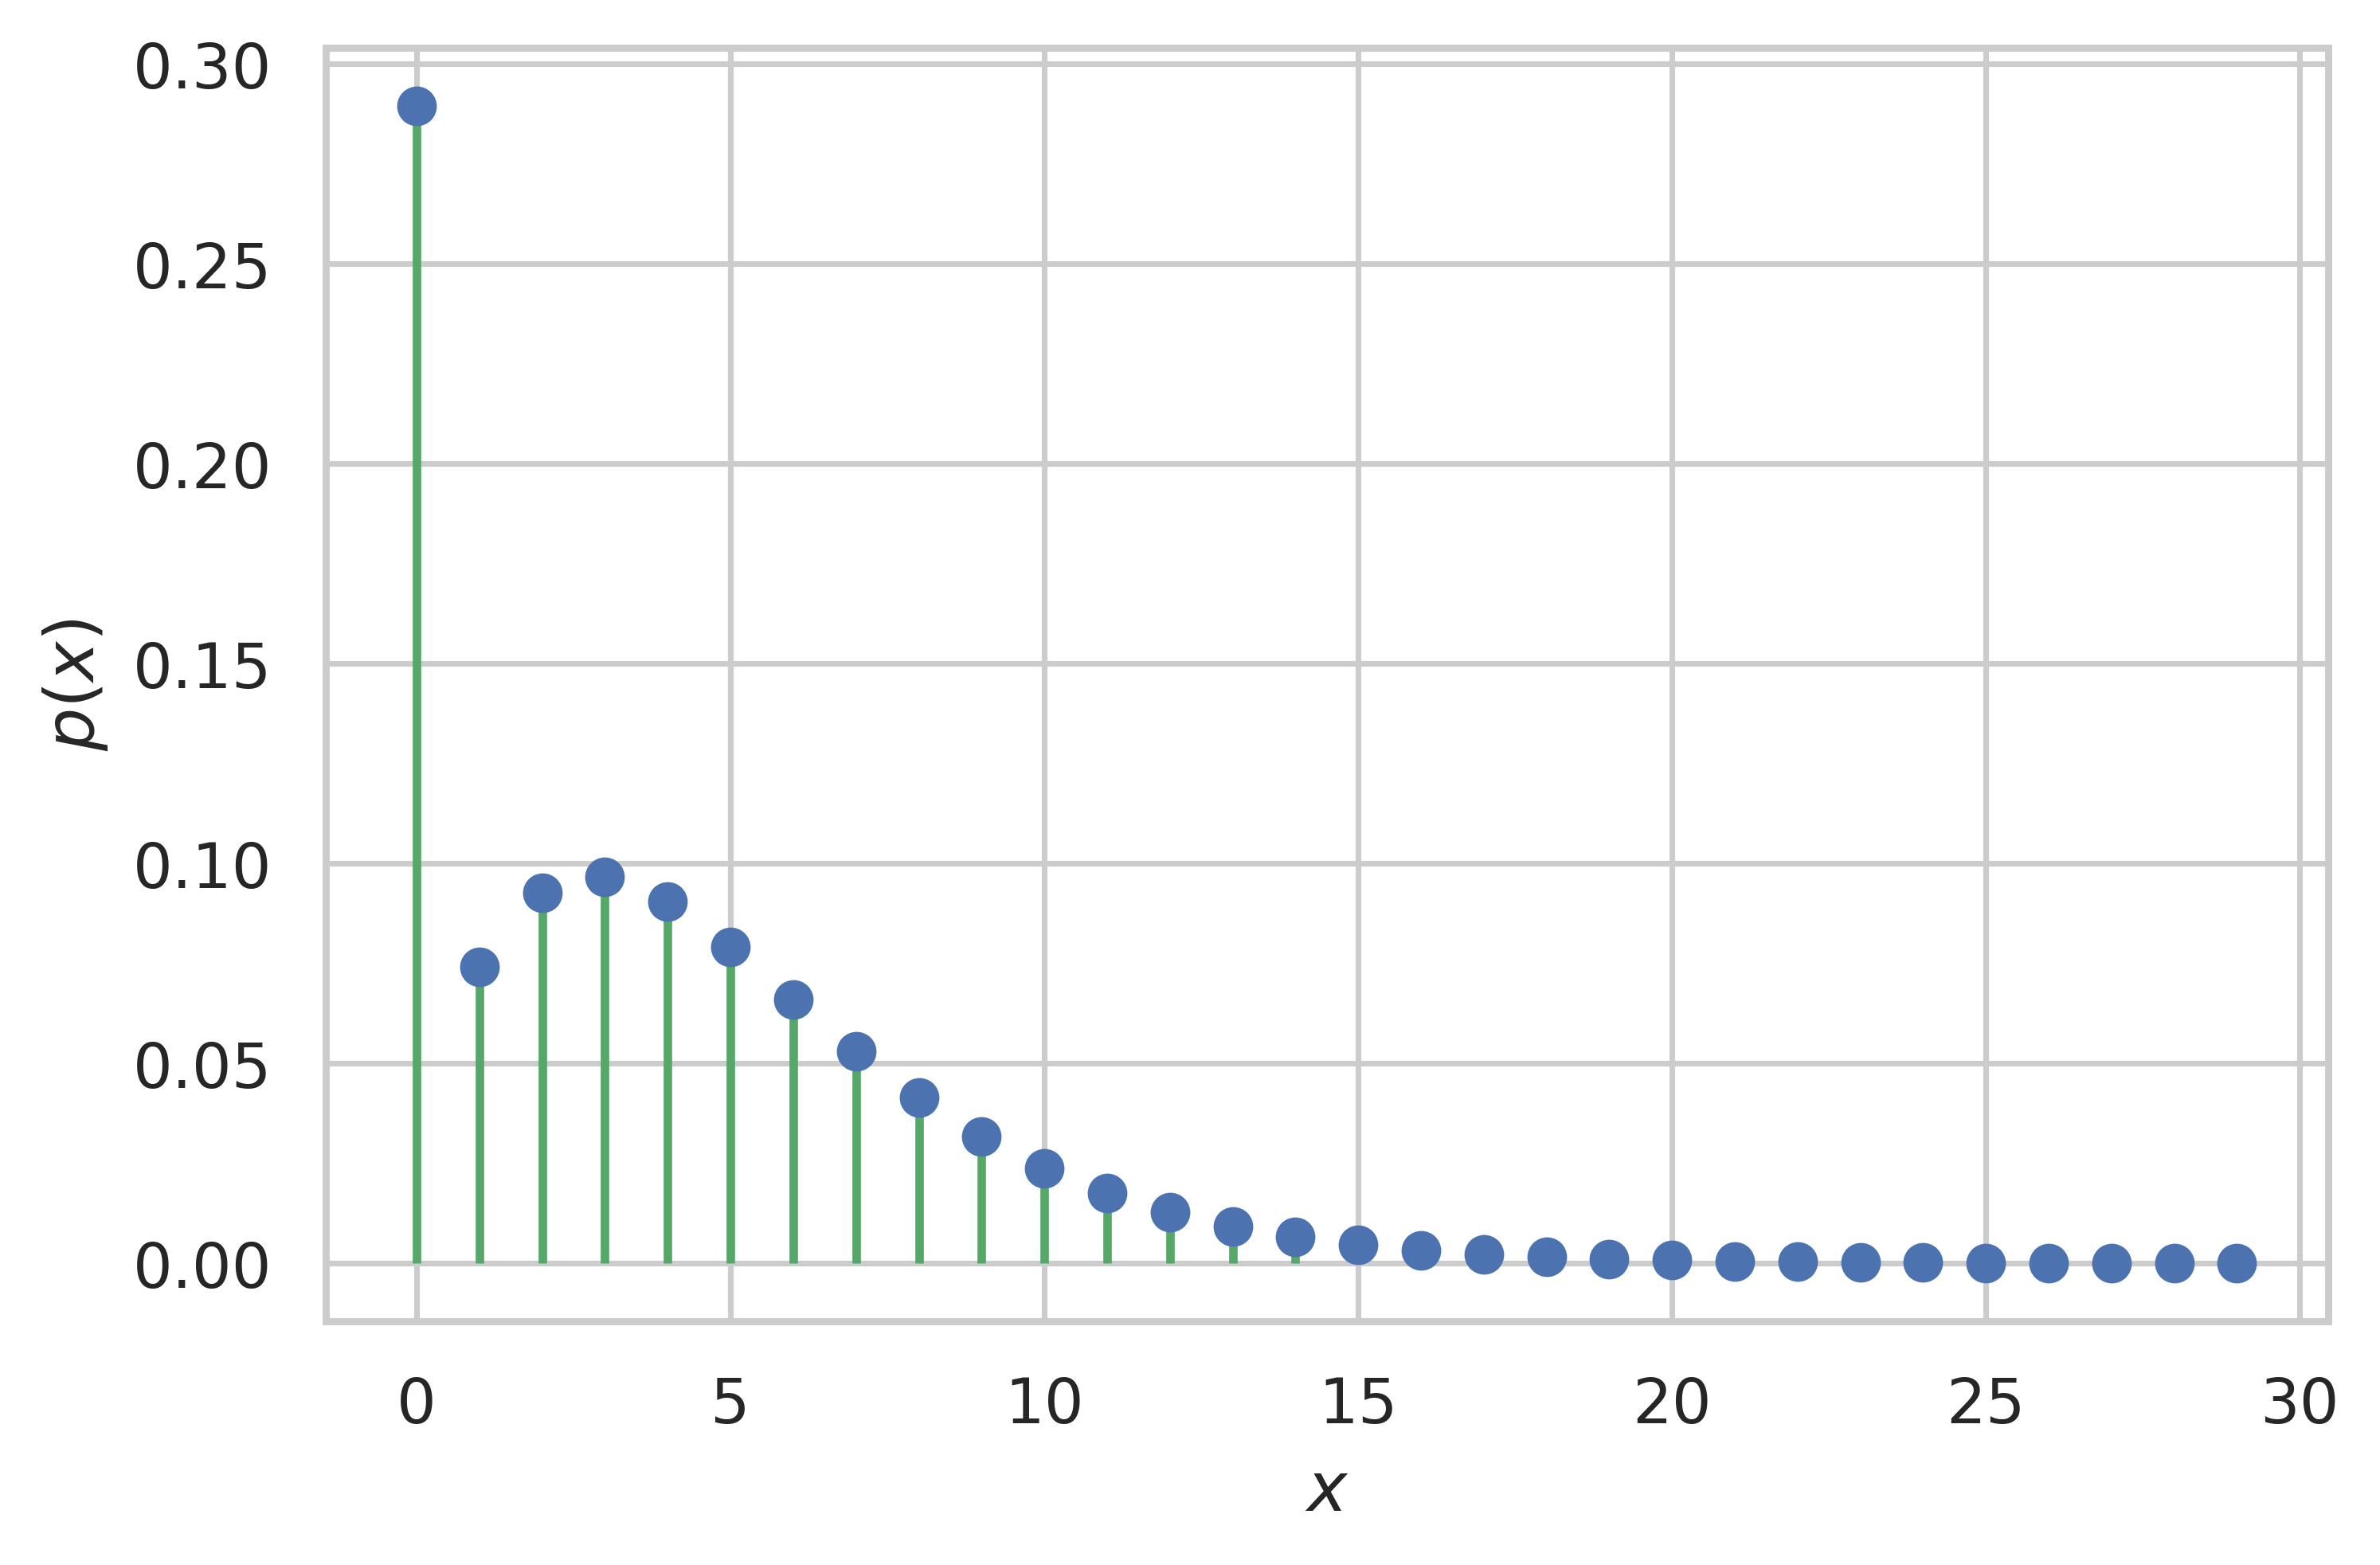

In [57]:
x = np.arange(0, 30, 1)

p = poisson(5).pmf

fig = plt.figure(figsize=(6, 4), dpi=512)
ax = fig.gca()
ax.vlines(x, 0, p(x), "g")
ax.plot(x, p(x), "bo")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
ax.autoscale(True)

fig.tight_layout()
fig.savefig("outputs/pmf/poisson.pdf")

alpha = [1, 3, 5]

for a in alpha:
    p = partial(negbinom, mu=5, alpha=a)

    fig = plt.figure(figsize=(6, 4), dpi=512)
    ax = fig.gca()
    ax.vlines(x, 0, p(x), "g")
    ax.plot(x, p(x), "bo")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p(x)$")
    ax.autoscale(True)

    fig.tight_layout()
    fig.savefig(f"outputs/pmf/neg_binom_{a}.pdf")

p = np.vectorize(partial(zero_inflated, theta=0.25, pmf=poisson(5).pmf))

fig = plt.figure(figsize=(6, 4), dpi=512)
ax = fig.gca()
ax.vlines(x, 0, p(x), "g")
ax.plot(x, p(x), "bo")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
ax.autoscale(True)

fig.tight_layout()
fig.savefig("outputs/pmf/zero_inflated_poisson.pdf")

p = np.vectorize(
    partial(zero_inflated, theta=0.25, pmf=partial(negbinom, mu=5, alpha=3.0))
)

fig = plt.figure(figsize=(6, 4), dpi=512)
ax = fig.gca()
ax.vlines(x, 0, p(x), "g")
ax.plot(x, p(x), "bo")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
ax.autoscale(True)

fig.tight_layout()
fig.savefig("outputs/pmf/zero_inflated_neg_binom.pdf")

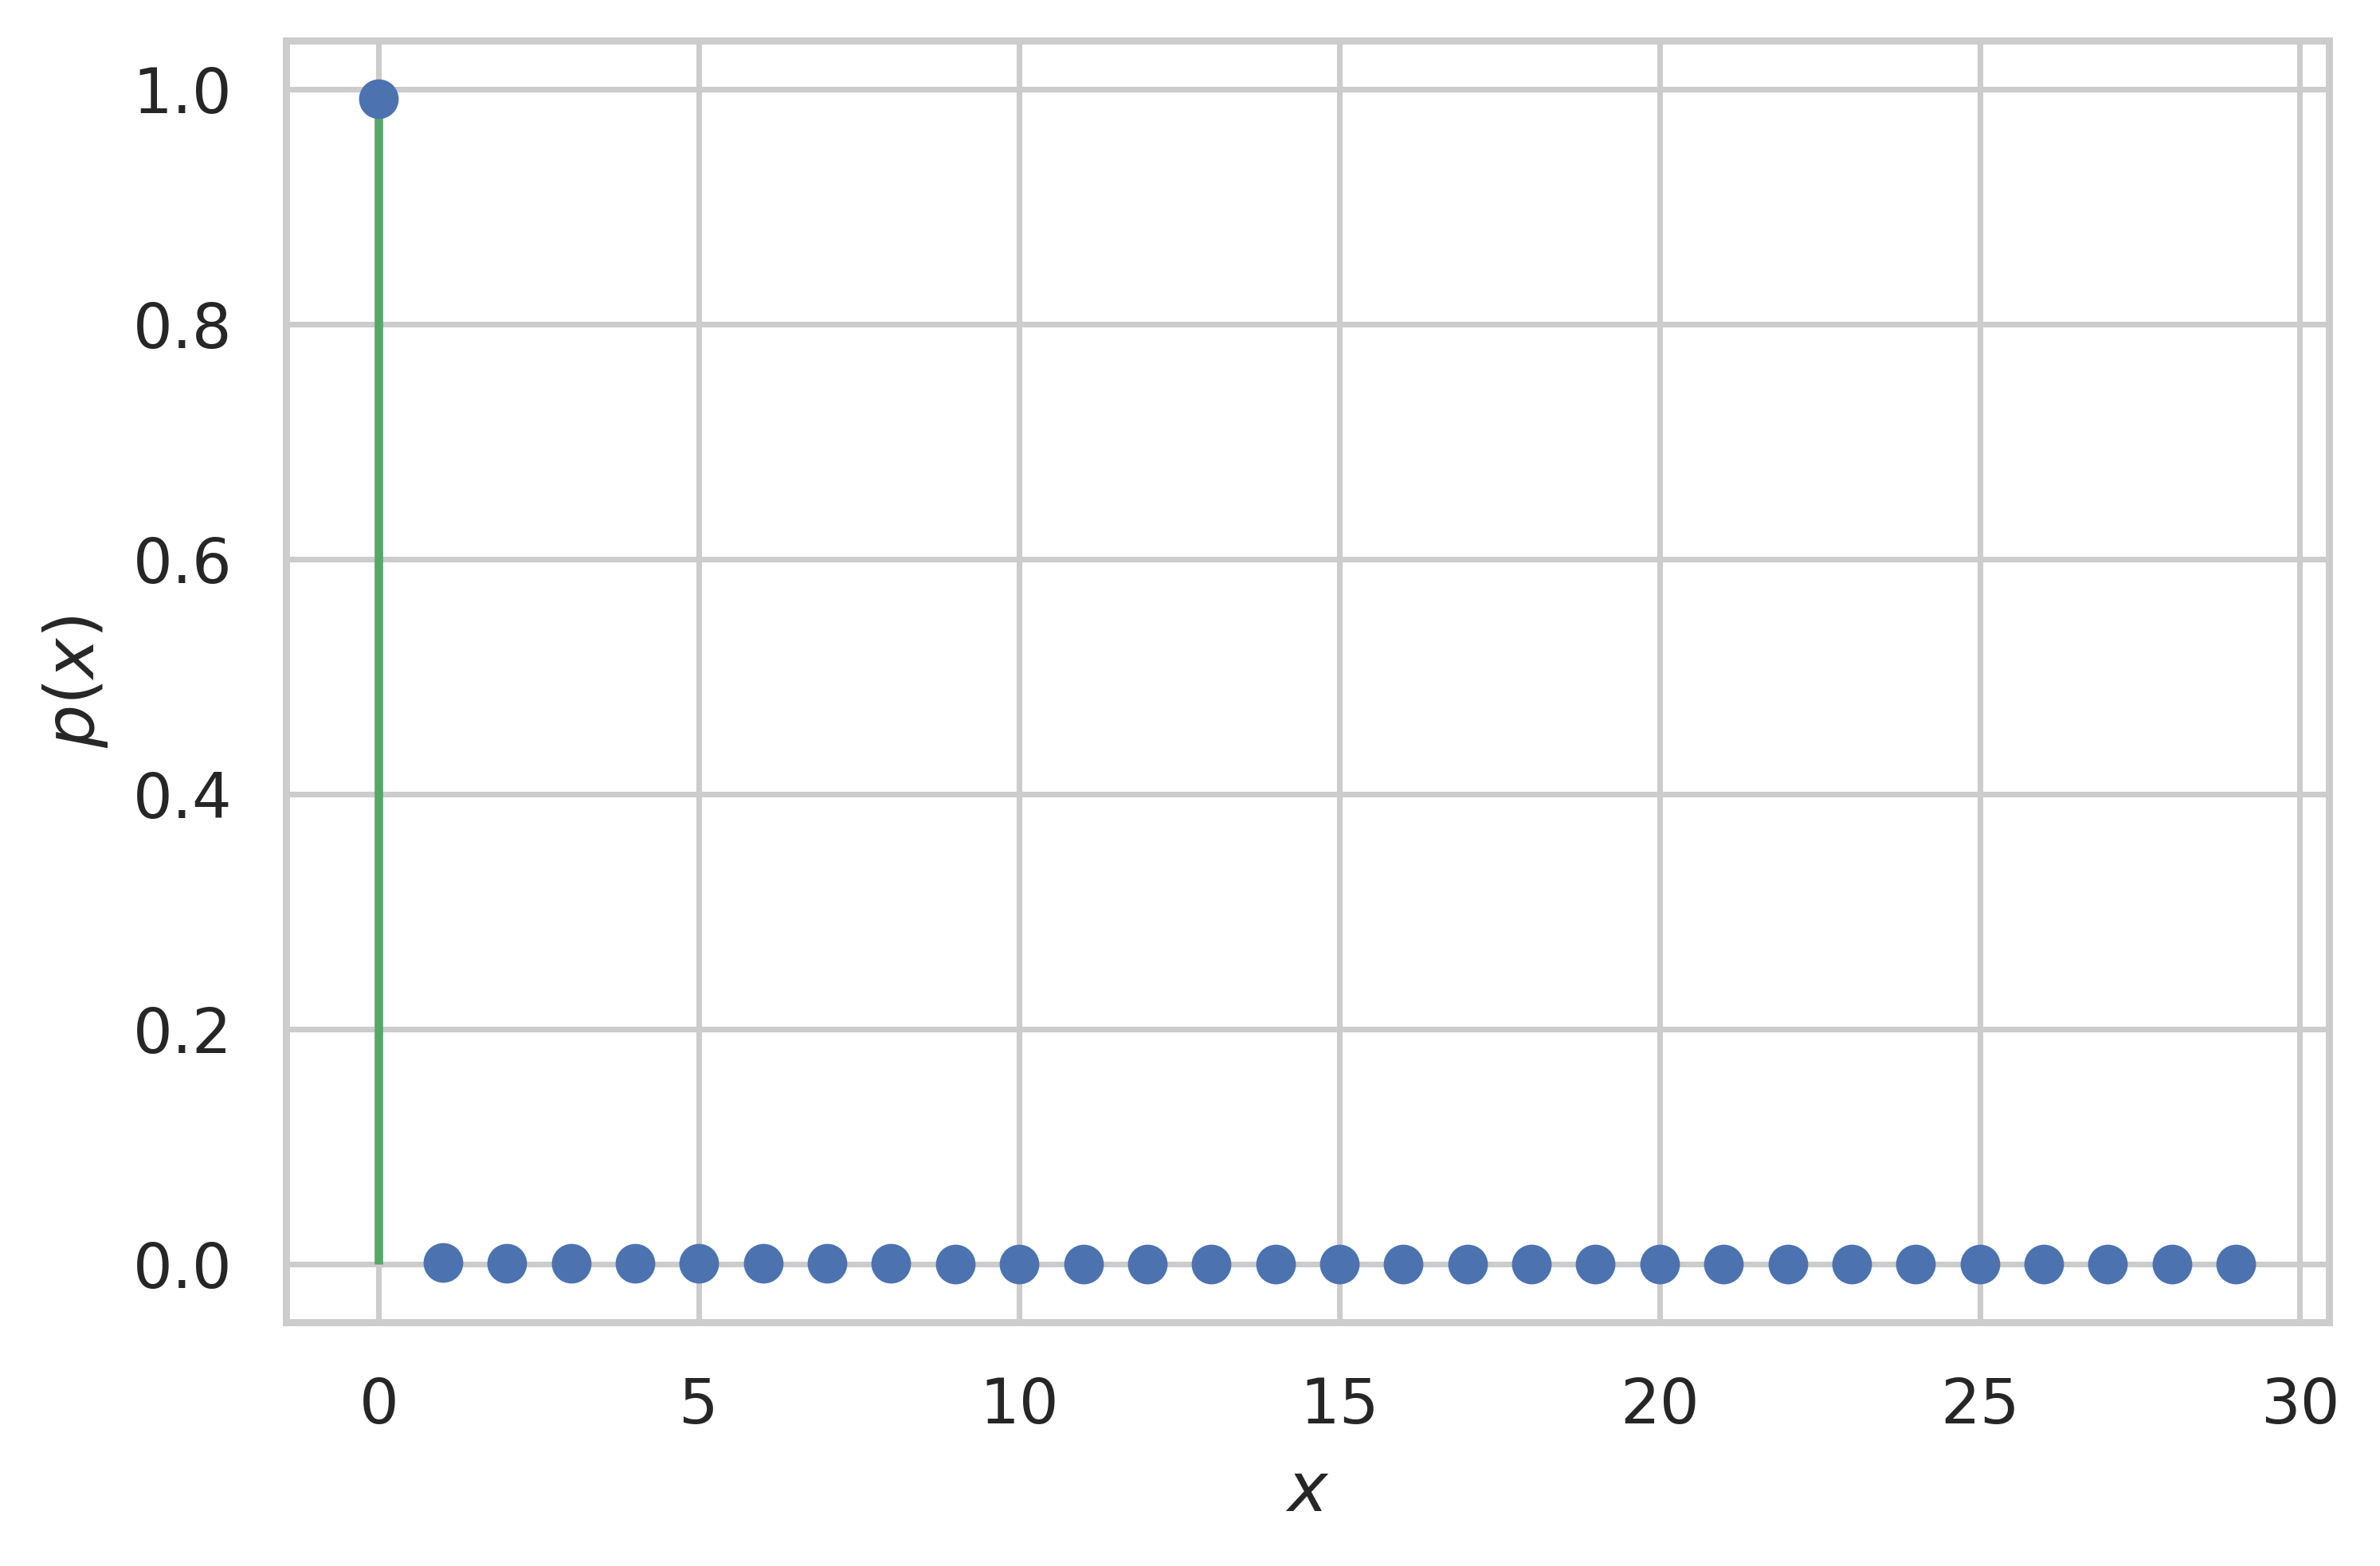

In [58]:
p = partial(negbinom, mu=5, alpha=0.001)

fig = plt.figure(figsize=(6, 4), dpi=512)
ax = fig.gca()
ax.vlines(x, 0, p(x), "g")
ax.plot(x, p(x), "bo")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
ax.autoscale(True)

fig.tight_layout()

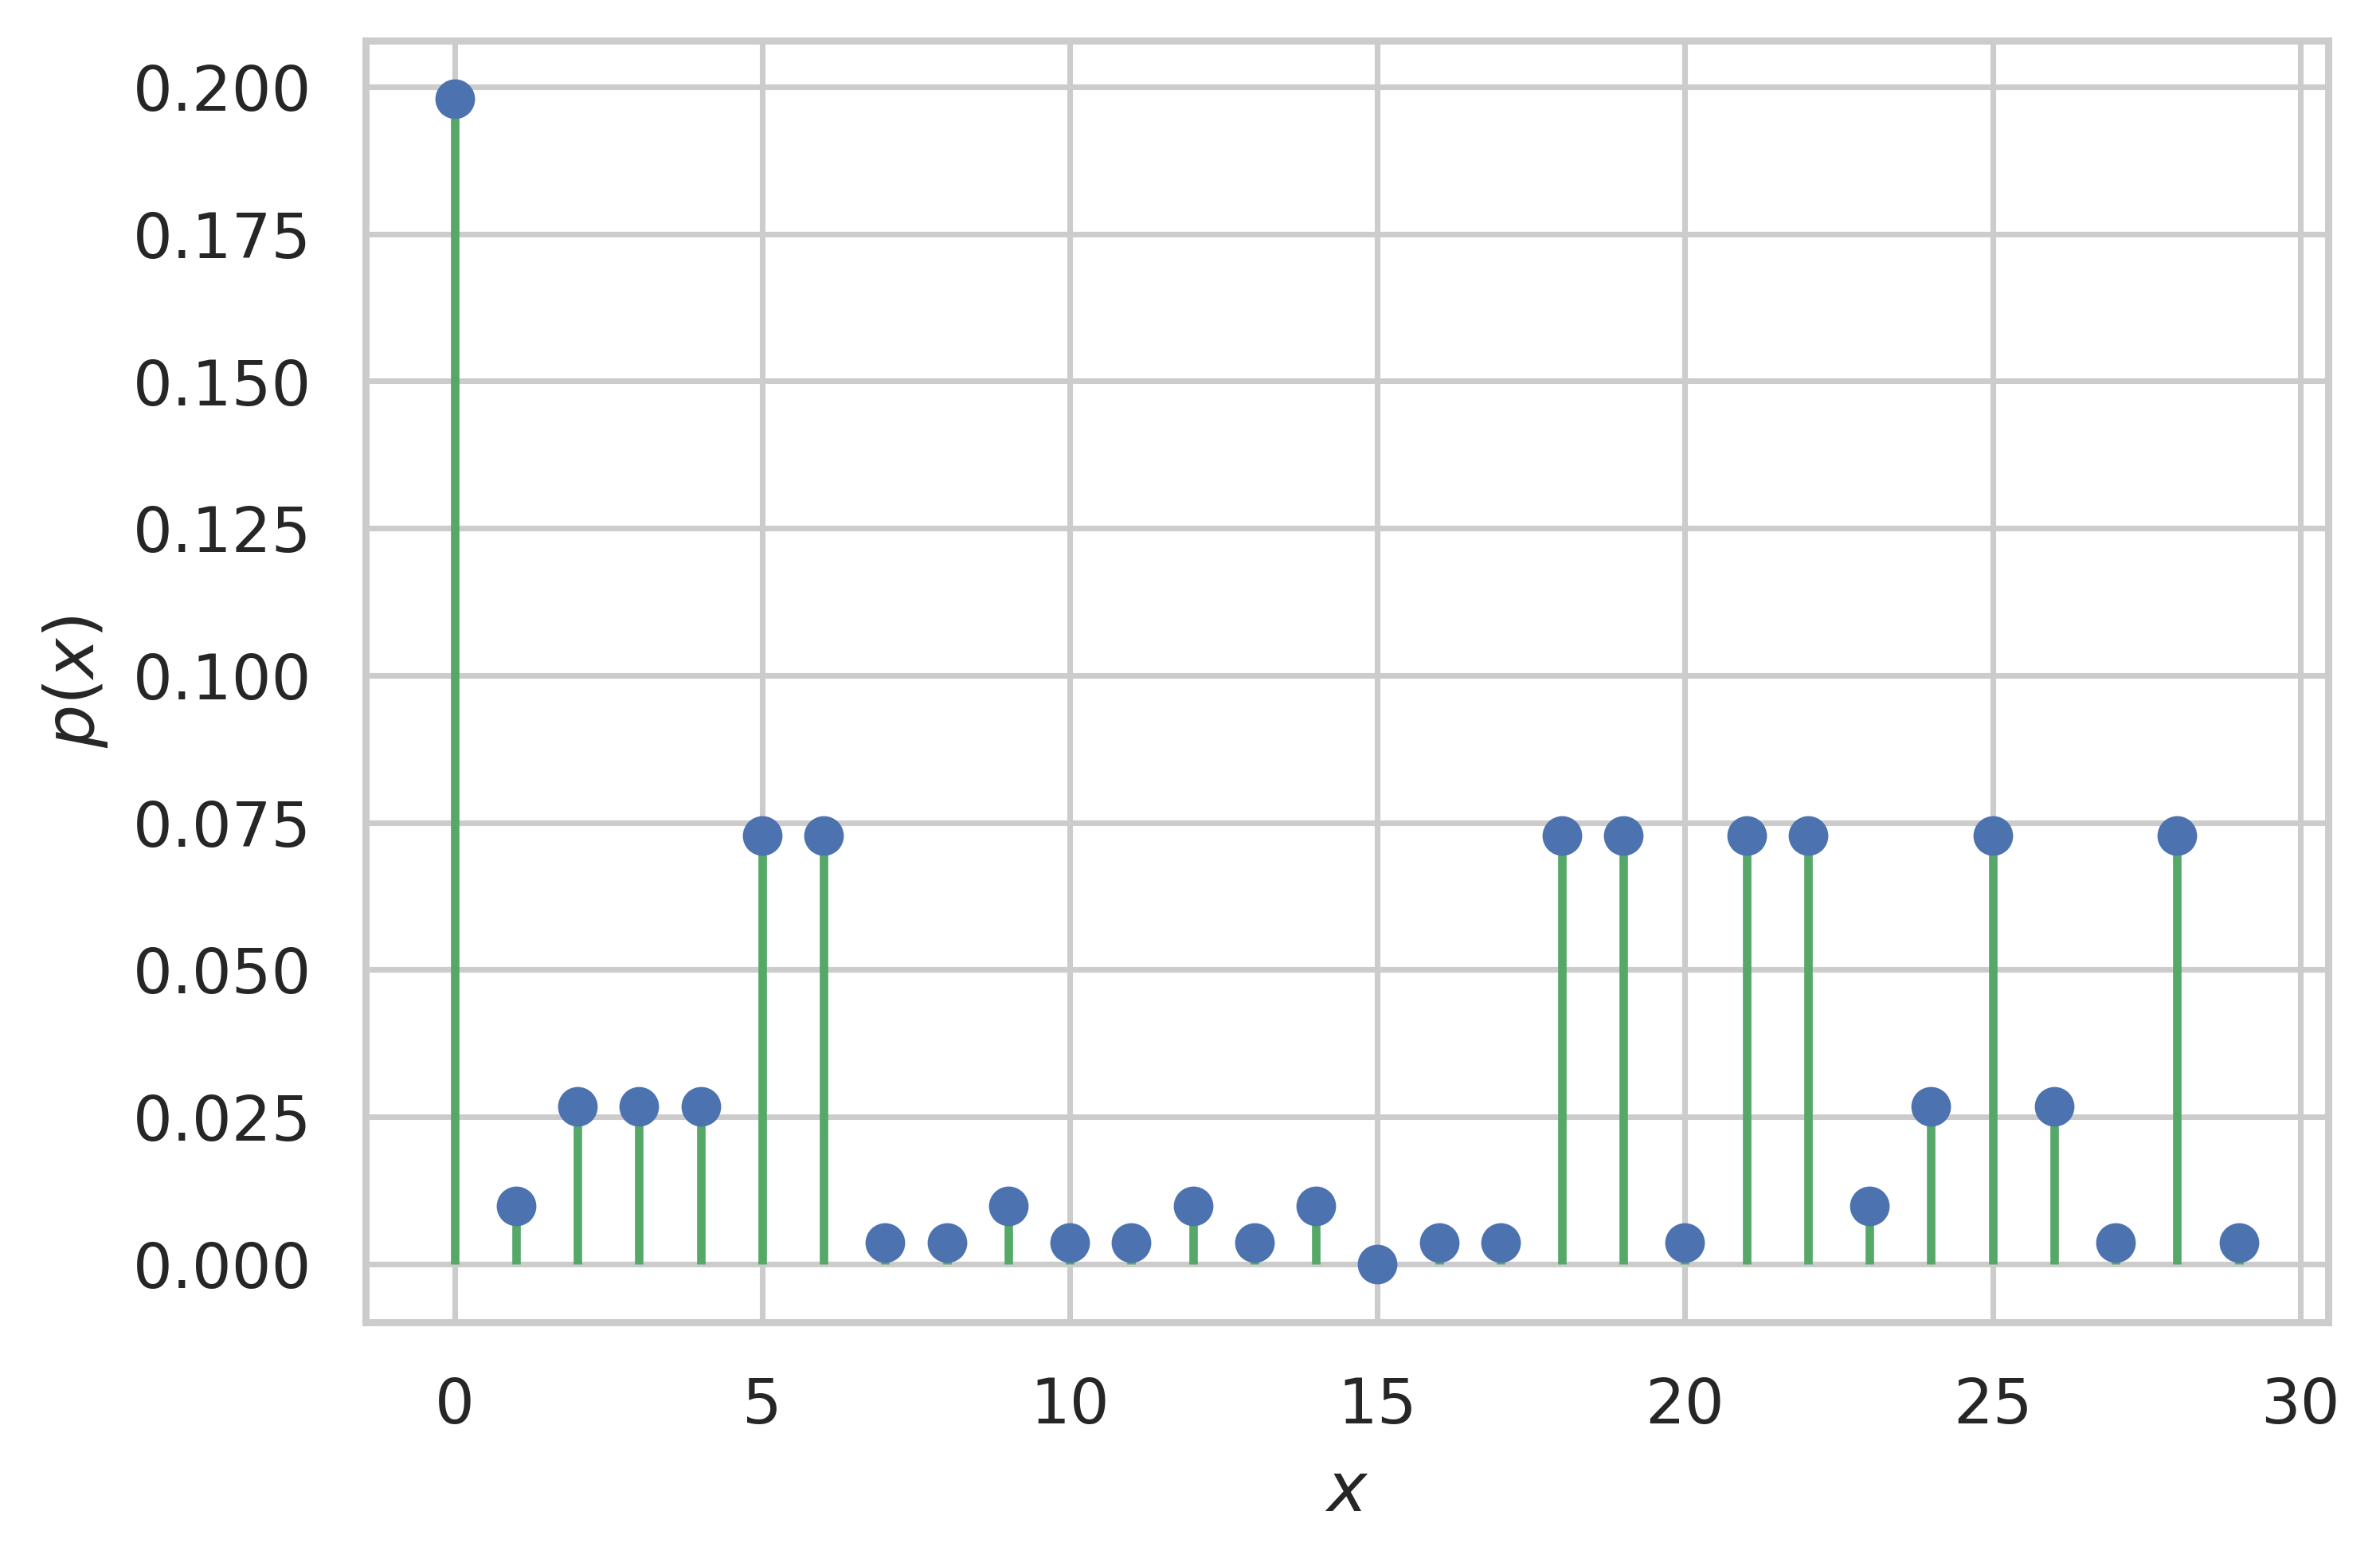

In [33]:
cat = np.zeros(30)
cat[0] = 2
cat[15] = -10

for i in range(30):
    if i in [0, 15]:
        continue

    cat[i] = np.random.randint(-2, 2)

cat = np.exp(cat) / np.exp(cat).sum()

fig = plt.figure(figsize=(6, 4), dpi=512)
ax = fig.gca()
ax.vlines(x, 0, cat, "g")
ax.plot(x, cat, "bo")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
ax.autoscale(True)

fig.tight_layout()
fig.savefig("outputs/pmf/categorical.pdf")

In [212]:
import networkx as nx

G = nx.DiGraph(
    [
        ("OVEN", "MICROWAVE"),
        ("OVEN", "REFRIGERATOR"),
        ("OVEN", "TOASTER"),
        ("TOASTER", "SCISSORS"),
    ]
)

pgv = nx.nx_agraph.to_agraph(G)

pgv.node_attr["shape"] = "box"
pgv.graph_attr["dpi"] = 512
pgv.draw("outputs/bn_example.pdf", prog="dot")